<a href="https://colab.research.google.com/github/preamza02/digImageClass_1-2023/blob/main/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #1

In [ ]:
# homework1 --> do not modify/remove this first line and do not add anything before this line
# do not change function name / variable name
# make sure that this block can successfully run on its own without error

# import library below
import cv2
import numpy as np


def homework1_1(image_grayscale):
    # input -> image_grayscale - type -> np.ndarray, size of - (height, width)
    # output -> image_grayscale - type -> np.ndarray, size of - (height, width)

    # TO DO - Implement transformation based on the contrast stretching graph
    filtered_image = np.zeros((image_grayscale.shape),dtype=np.uint8)

    L = 255
    r1,s1 = L/3,L/8
    r2,s2 = (5*L)/8,(7*L)/8

    def equation(number,L=L,r1=r1,s1=s1,r2=r2,s2=s2):
      # y= m * (number - k) + c
      c = 0
      m = 0
      k = 0
      if number <= r1:
        m = s1/r1
      elif number <= r2:
        m = (s2-s1)/(r2-r1)
        k = r1
        c = s1
      else :
        m = (L-s2)/(L-r2)
        k = r2
        c = s2
      return m * (number - k) + c

    tranfrom_image = np.array([[equation(pixel) for pixel in row] for row in image_grayscale]).astype(np.uint8)
    filtered_image += tranfrom_image
    return filtered_image


def homework1_2(rgbimage):
    # input -> rgbimage - type -> np.ndarray, size of - (height, width, 3)
    # output -> filtered_image - type -> np.ndarray, size of - (height, width, 3)

    # TO DO - Design your own filter
    filtered_image = np.zeros((rgbimage.shape),dtype=np.uint8)

    def equation1(rgbimage):
      new_image = np.zeros((rgbimage.shape),dtype=np.int16)
      filter = np.array(
          [
              [0,1,0],
                [1,-3 ,1],
                [0,1,0]
          ],
                        np.int16)
      for layers in range(3):
        for row in range(1,rgbimage.shape[0] - 1):
          for col in range(1,rgbimage.shape[1] - 1):
            # print(np.dot(rgbimage[row-1:row+2,col-1:col+2,layers],filter).sum())
            x = np.dot(rgbimage[row-1:row+2,col-1:col+2,layers],filter).sum()
            if x >255:
              x = 255
            elif x <0:
              x = 0
            new_image[row][col][layers] += x
      return new_image

    def equation2(rgbimage):
      gain = 2
      bias = -50
      a = rgbimage.astype(np.int16) + bias
      a = a*2
      a[a>255] = 255
      a[a<0] = 0
      return a

    filtered_image += equation1(equation2(rgbimage)).astype(np.uint8)


    return filtered_image




In [ ]:
# fill in  {___Fill____} below
import cv2
import numpy as np
import matplotlib.pyplot as plt

def homework1_4 (rgbImage):
    # Convert the image to grayscale
    grayImg = cv2.cvtColor(rgbImage,cv2.COLOR_BGR2GRAY)

    # 4.1 Use the median filter to smooth the image
    smoothed_img = cv2.medianBlur(grayImg, 3)

    # 4.2 Make ROI with
    # Create an interesting area
    mark = np.ones((smoothed_img.shape[0], smoothed_img.shape[1]), dtype=np.uint8) * 255
    # Set the coordinates of the rectangle
    start_point = (300, 275)
    img_size = (380,435)
    end_point = (start_point[0] + img_size[0], start_point[1] + img_size[1])

    # Draw a black square at the center
    cv2.rectangle(mark ,start_point, end_point, (0), -1)
    # Mark the area in the image
    mark_ROI = smoothed_img[start_point[0]:end_point[0],start_point[1]:end_point[1]]

    # 4.3 Use Gray Level slicing
    Gray_Level_img = mark_ROI.copy()
    Gray_Level_img[(mark_ROI >= 224)]  = 255
    Gray_Level_img[(mark_ROI < 224)] = 0

    # Picture show Row1
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 2, 1)
    plt.imshow(rgbImage[:, :, ::-1])
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(smoothed_img, cmap='gray')
    plt.title('Image after smoothing')
    plt.axis('off')

    # Picture show Row2
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(mark_ROI, cmap='gray')
    plt.title('Mark ROI Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(Gray_Level_img, cmap='gray')
    plt.title('Segmentation with transformation img')
    plt.axis('off')

    plt.show()


# Test your functions

In [ ]:
!wget https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe -O kitty.jpg
!wget https://drive.google.com/uc?id=1mIO58Oat2rxLg-c82eN2TLH8sTucQJGI -O noisy_ct.jpg
!wget https://i.pinimg.com/originals/e8/70/e4/e870e4c6cf86476763e79813729673b1.jpg -O bodybuilder.jpg
!wget https://1417094351.rsc.cdn77.org/articles/3987/3986553/thumbnail/large.gif?4 -O meme.jpg

--2023-09-04 09:58:22--  https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.google.com (drive.google.com)... 142.251.16.102, 142.251.16.100, 142.251.16.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4al4kg09n2cl99sgc03at2j08eci1e7s/1693821450000/10800959494545164832/*/1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe?uuid=ca58f4c8-773e-401c-8394-a4580a7a63d3 [following]
--2023-09-04 09:58:23--  https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4al4kg09n2cl99sgc03at2j08eci1e7s/1693821450000/10800959494545164832/*/1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe?uuid=ca58f4c8-773e-401c-8394-a4580a7a63d3
Resolving doc-0s-2o-docs.googleusercontent.com (doc-0s-2o-docs.googleusercontent.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to doc-0s

show image /content/meme.jpg


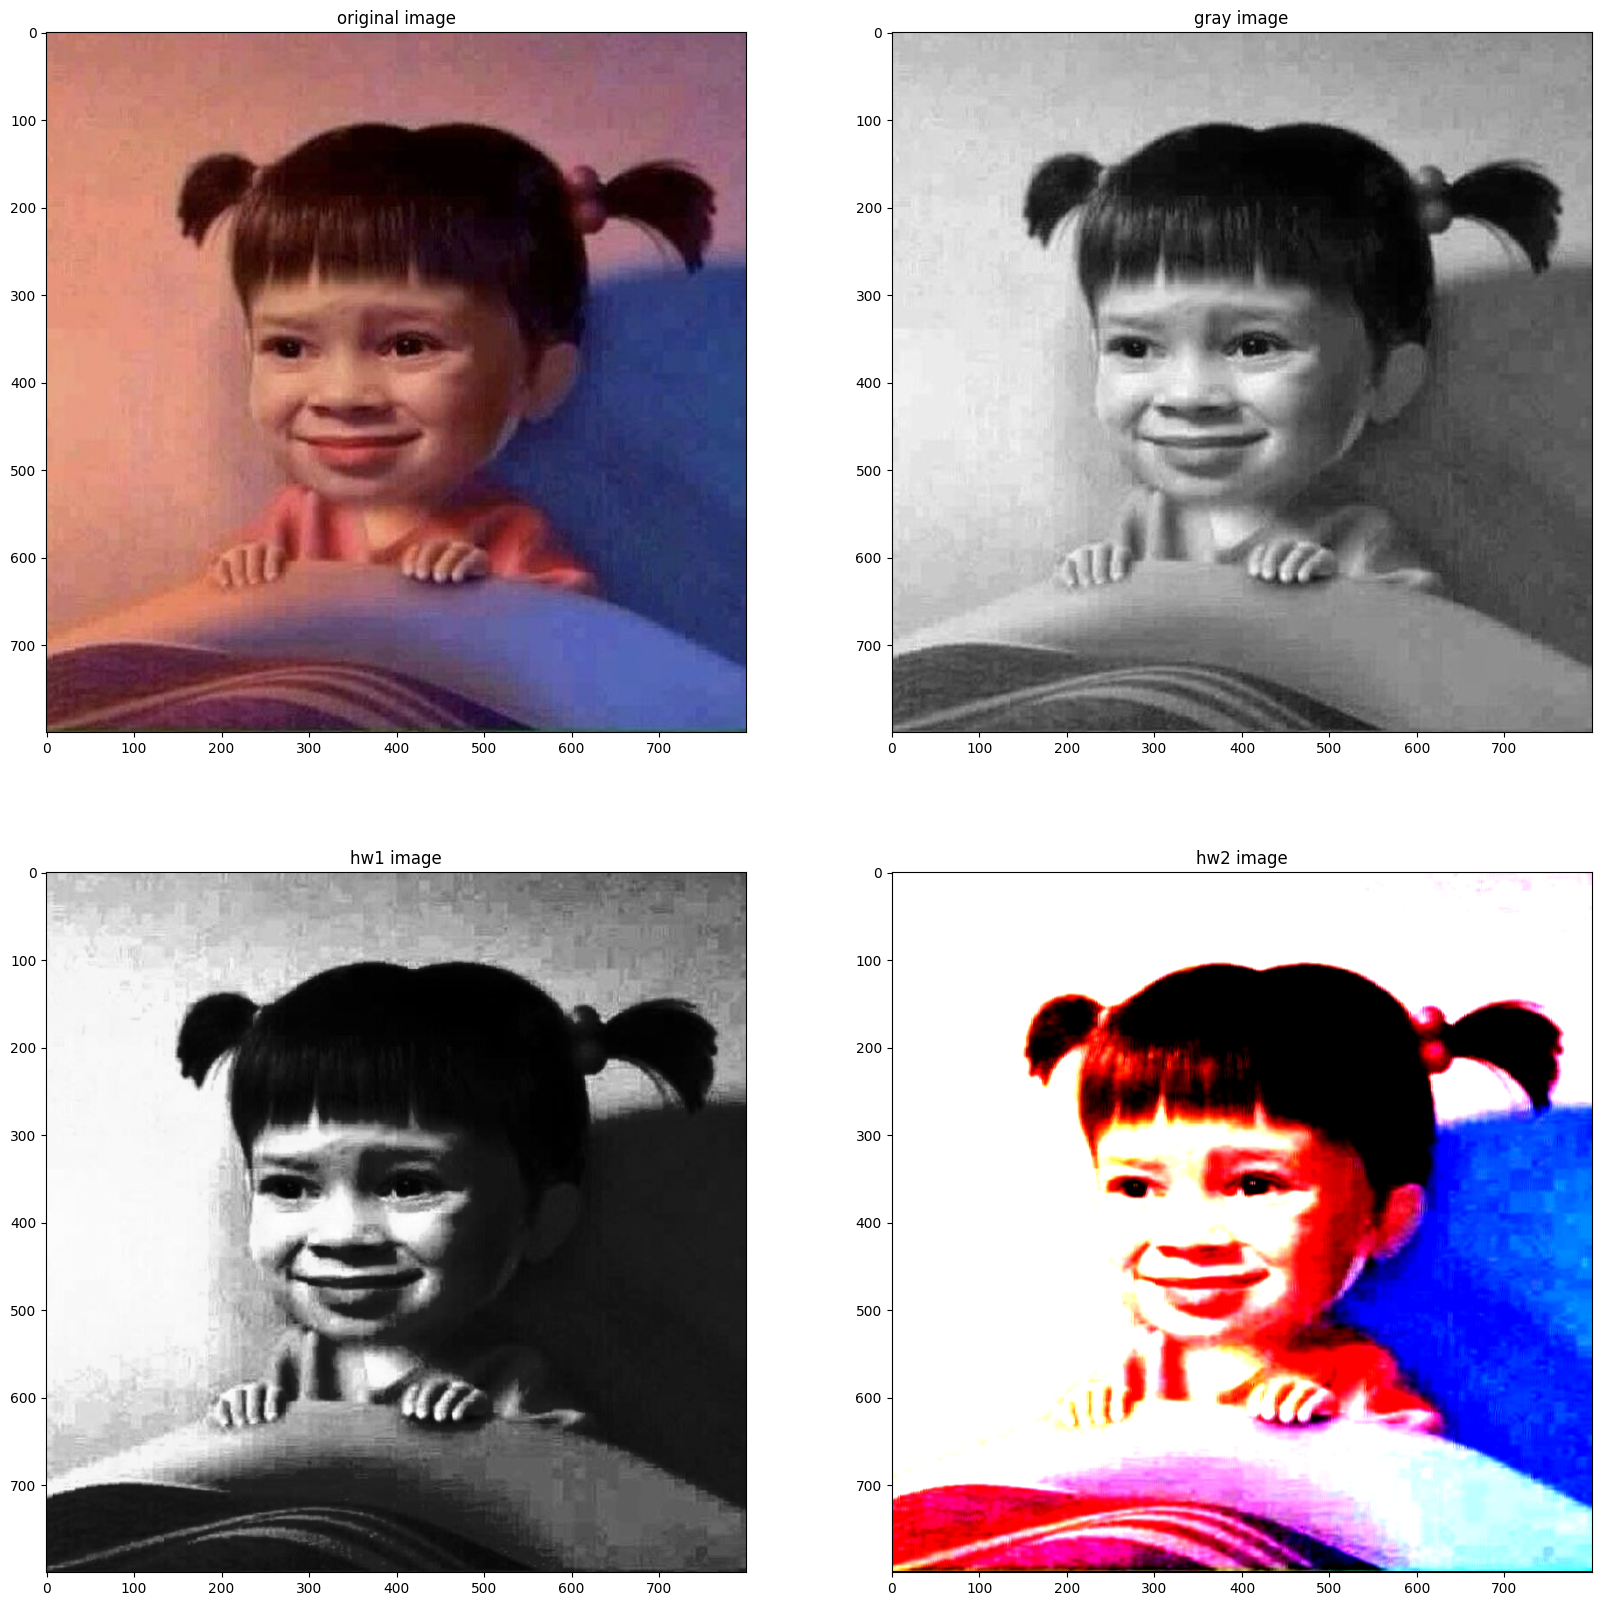

-------------------------------------------------
show image /content/bodybuilder.jpg


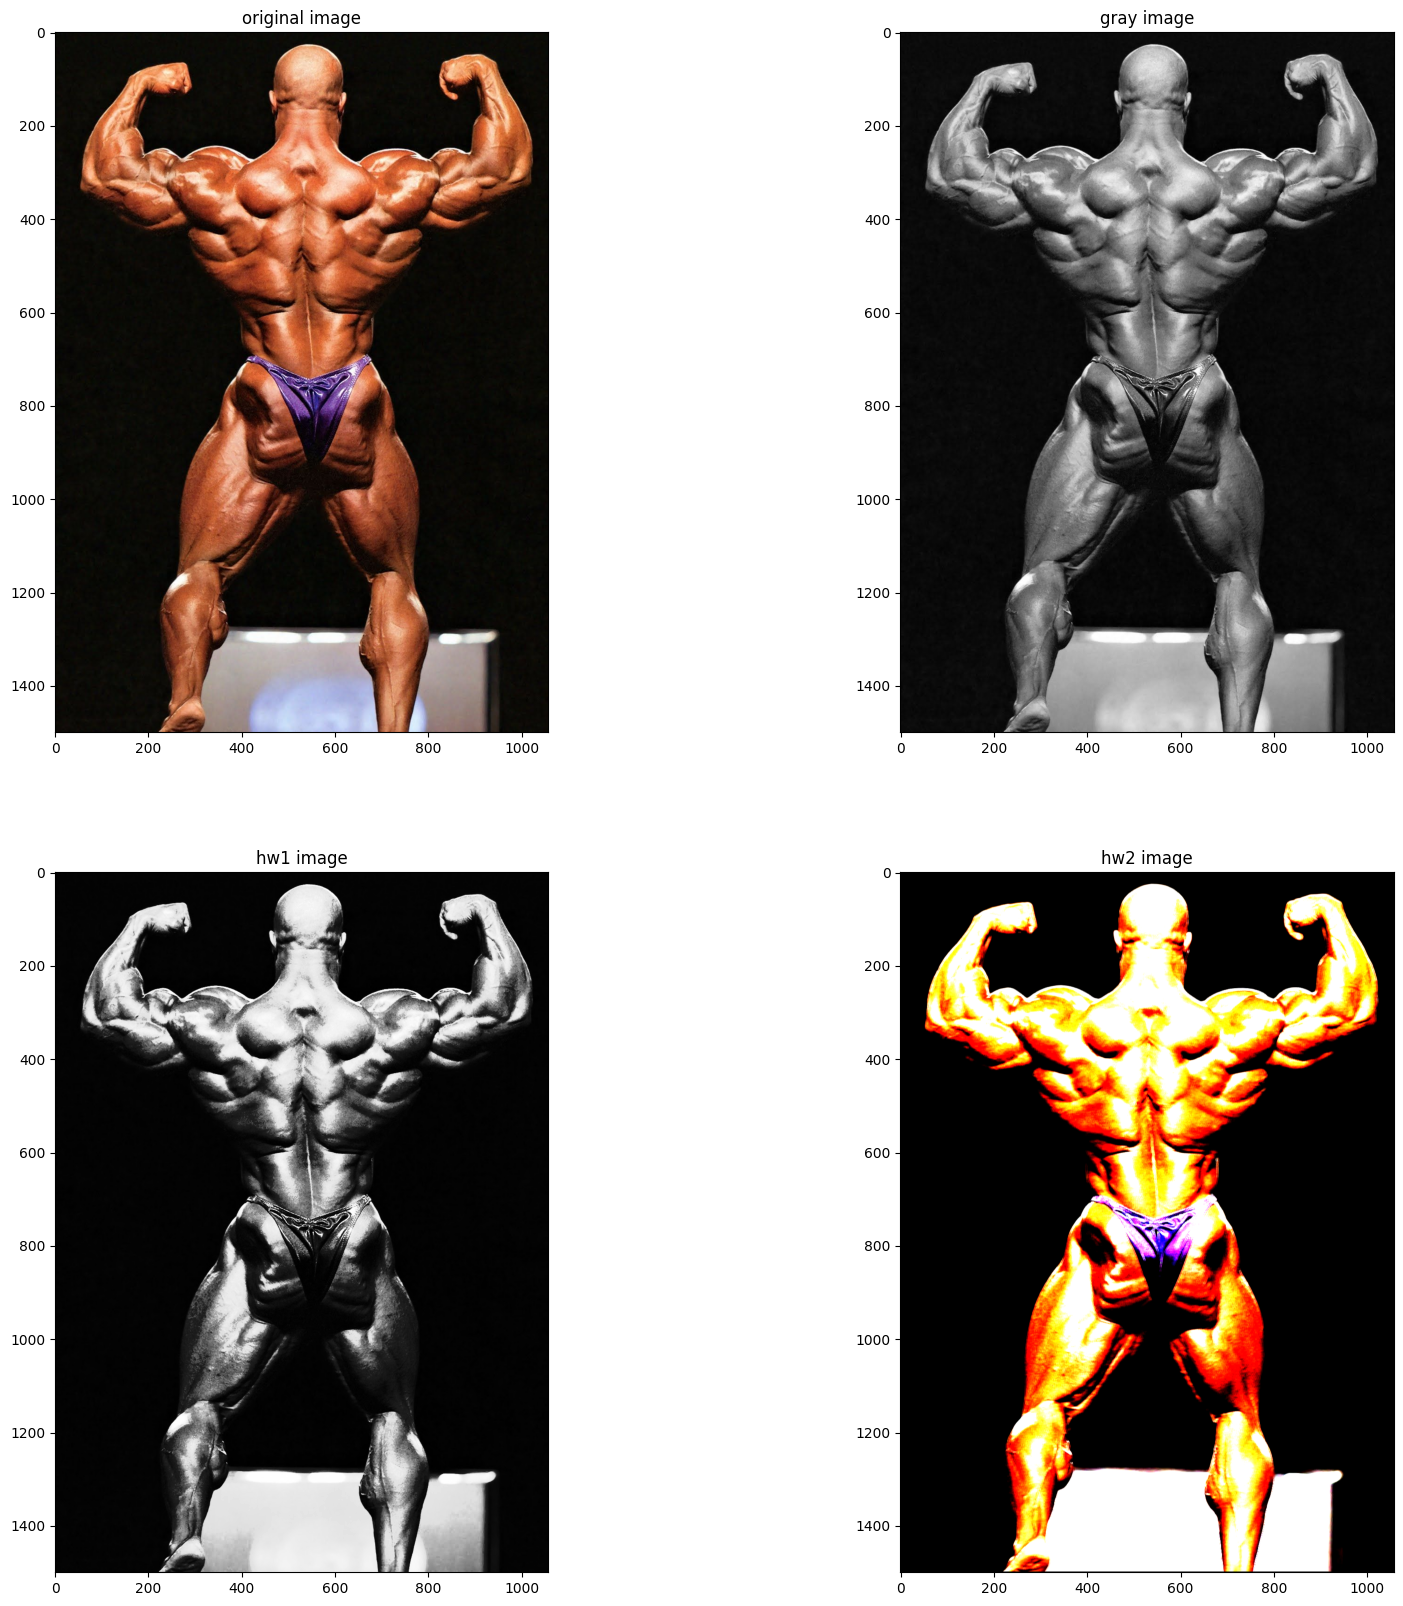

-------------------------------------------------


In [ ]:
# test your function
import matplotlib.pyplot as plt
import cv2

images_list = ['/content/meme.jpg','/content/bodybuilder.jpg']

for img_path in images_list:

  print(f'show image {img_path}')
  plt.figure(figsize = (20,20))
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

  plt.subplot(2,2,1)
  plt.title('original image')
  plt.imshow(img)

  plt.subplot(2,2,2)
  plt.title('gray image')
  plt.imshow(img_gray,cmap = 'gray')

  plt.subplot(2,2,3)
  plt.title('hw1 image')
  img_hw1 = homework1_1(img_gray)
  plt.imshow(img_hw1,cmap = 'gray')

  plt.subplot(2,2,4)
  plt.title('hw2 image')
  img_hw2 = homework1_2(img)
  plt.imshow(img_hw2)
  plt.show()

  print("-------------------------------------------------")




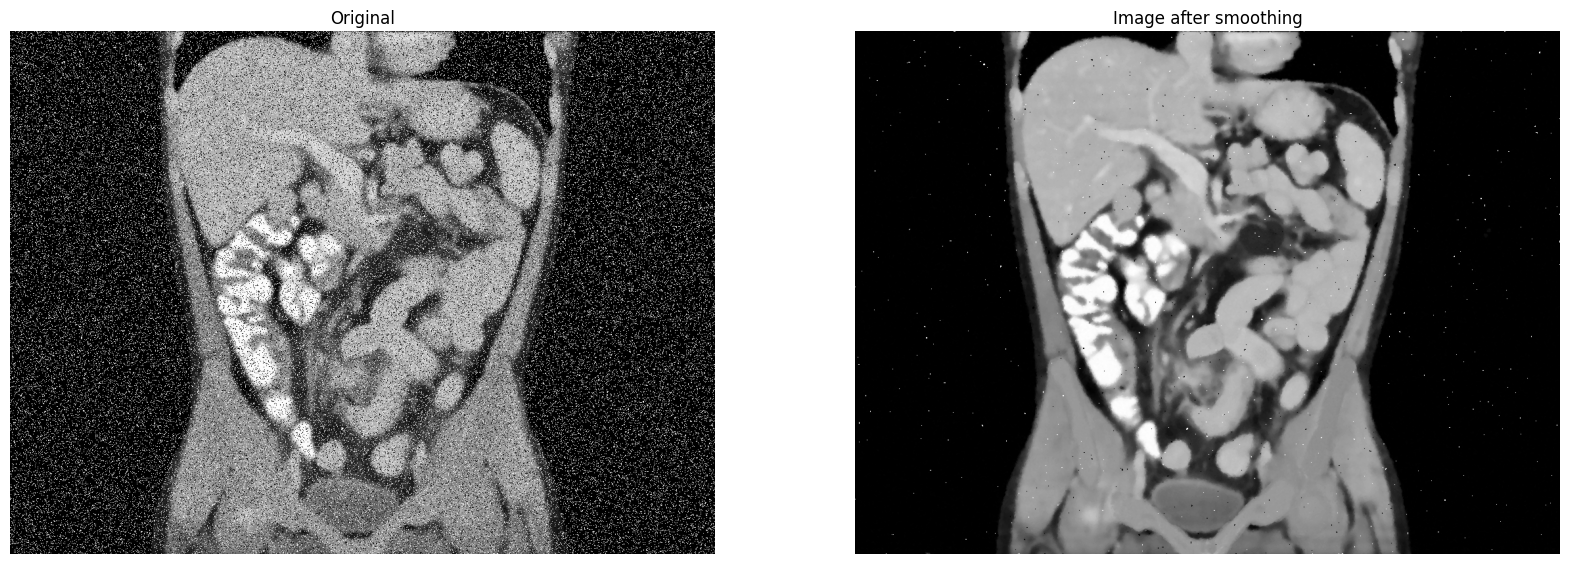

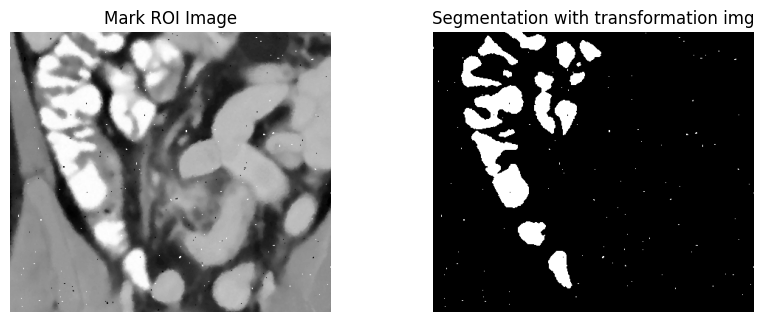

In [ ]:
img14 = cv2.imread("noisy_ct.jpg")
homework1_4(img14)

# homework1_3

In [ ]:
def plot_hist(img):
  colors = ['red','green','blue']
  plt.figure(figsize = (20,20))
  plt.title("original image")
  plt.subplot(2,2,1)
  plt.imshow(img)
  img1d = img.reshape((img.shape[0]*img.shape[1],img.shape[2]))
  for i in range(3):
    plt.subplot(2,2,i+2)
    plt.title(colors[i])
    plt.hist(img1d[:,i],color = colors[i],range = (0,255))
  plt.show()

In [ ]:
def test_homewok3(h1_path,h2_path):
  print('plot h1')
  h1 = cv2.imread(h1_path)
  h1 = cv2.cvtColor(h1,cv2.COLOR_BGR2RGB)
  plot_hist(h1)
  print('plot h2')
  h2 = cv2.imread(h2_path)
  h2 = cv2.cvtColor(h2,cv2.COLOR_BGR2RGB)
  plot_hist(h2)

plot h1


<ipython-input-67-ae3f1ade48f5>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


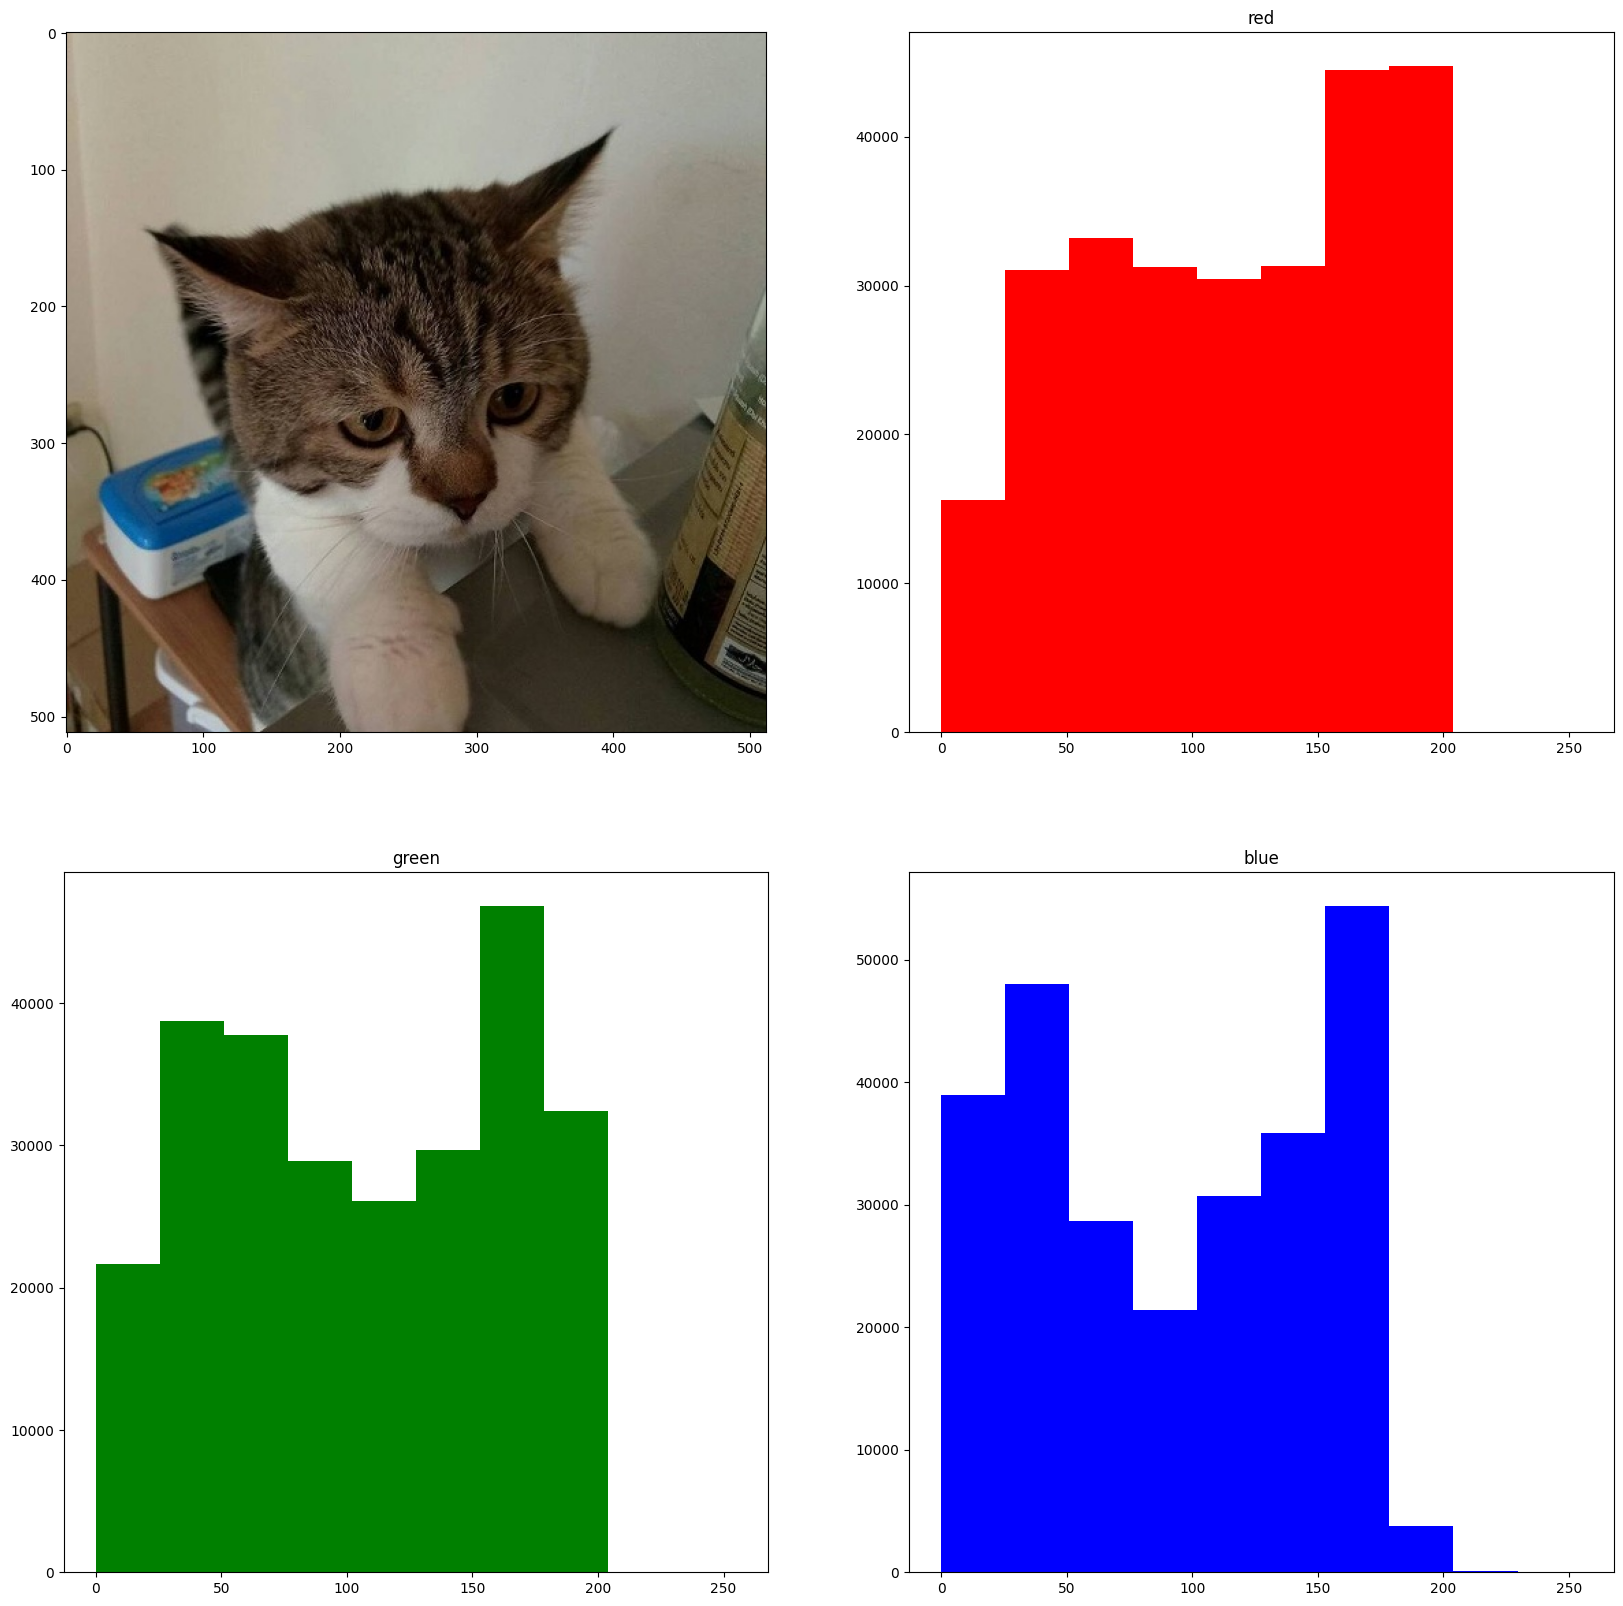

plot h2


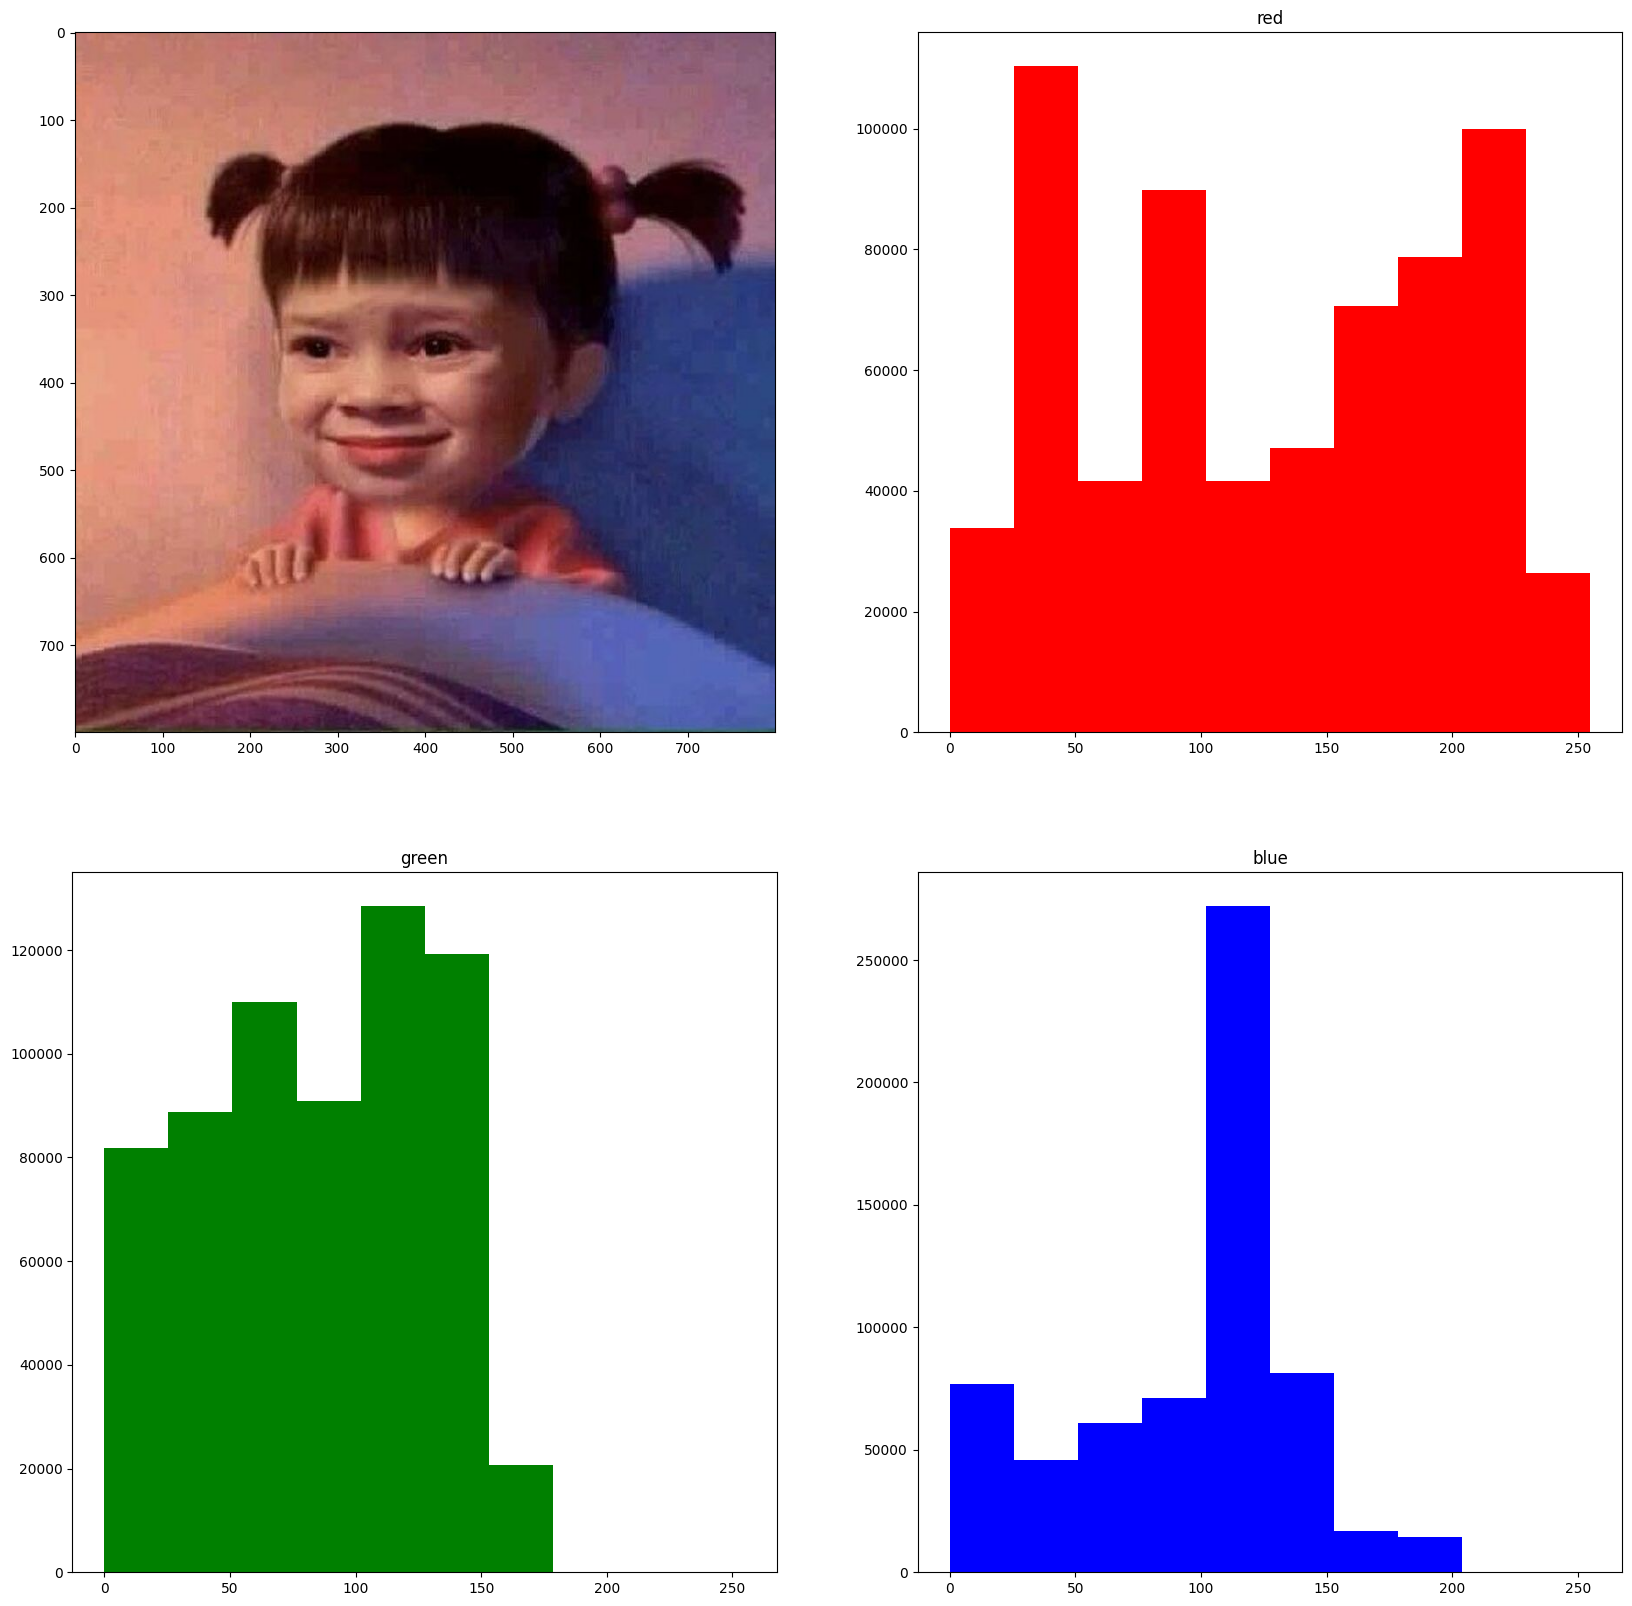

In [ ]:
test_homewok3('/content/kitty.jpg','/content/meme.jpg')